In [1]:
import scipy.stats as st
import pylab
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#loading the dataset
df=pd.read_csv("stud.csv")
df.sample(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
978,male,group D,high school,standard,completed,55,41,48
723,male,group C,high school,standard,none,50,48,42
397,female,group C,associate's degree,standard,none,85,89,95
726,female,group E,associate's degree,standard,completed,65,75,77
592,male,group E,bachelor's degree,standard,none,68,68,64


In [2]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

/var/folders/qh/c2j5shzd5f15l8q58y7grlwm0000gr/T/ipykernel_9065/3989849849.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True);


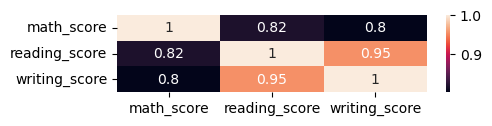

In [3]:
plt.figure(figsize=(5,1))
sns.heatmap(df.corr(),annot=True);

In [4]:
df=df[['reading_score','math_score']]

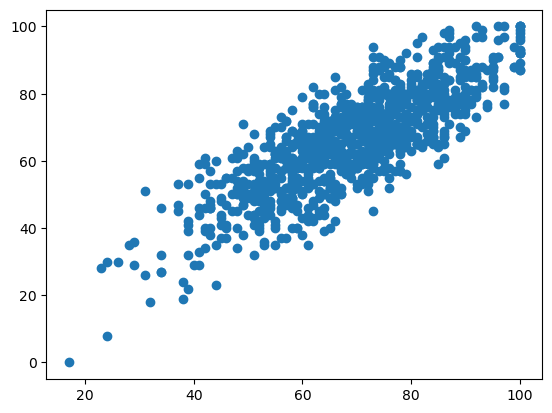

In [5]:
plt.scatter(df.reading_score,df.math_score);

In [6]:
x=df[['reading_score']]
y=df['math_score']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [9]:
x_test.shape,x_train.shape,y_train.shape,y_test.shape

((200, 1), (800, 1), (800,), (200,))

In [10]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [11]:
x_train=scalar.fit_transform(x_train)

In [12]:
x_train[0]

array([-0.9498156])

In [13]:
x_test=scalar.transform(x_test)

In [14]:
x_test[0]

array([0.33611983])

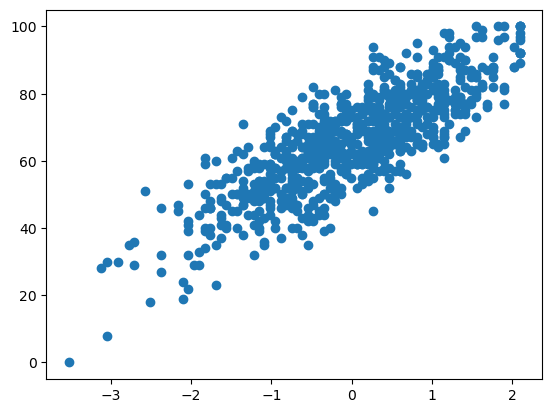

In [15]:
plt.scatter(x_train,y_train);

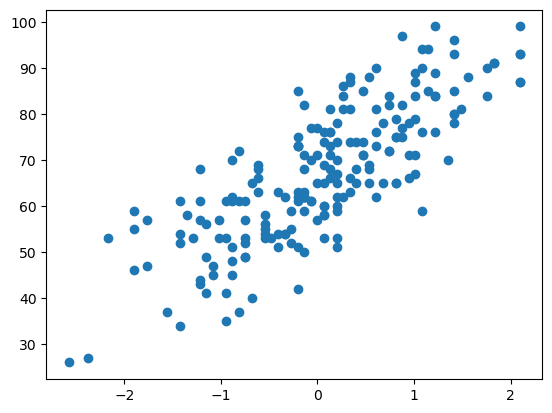

In [16]:
plt.scatter(x_test,y_test);

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
rgr =LinearRegression()

In [19]:
rgr.fit(x_test,y_test)

LinearRegression()

In [20]:
rgr.coef_[0]

12.582731959800176

In [21]:
rgr.intercept_

66.45409906330052

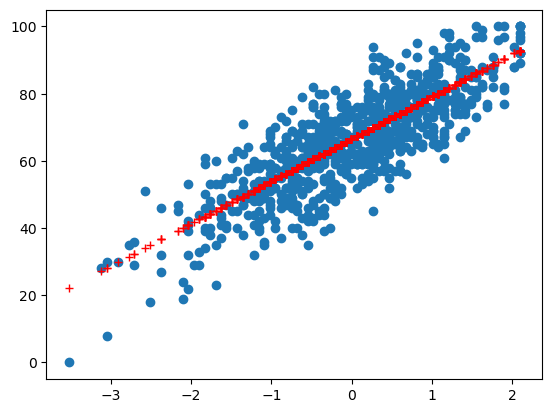

In [22]:
plt.scatter(x_train,y_train)
plt.plot(x_train,rgr.predict(x_train),'r+')

# Prediction of train data
1.prdicated credit score =intercept_+coeef_(estimarte salary)

In [23]:
y_predict=rgr.predict(x_test)

In [24]:
y_predict[0]

70.68340483318417

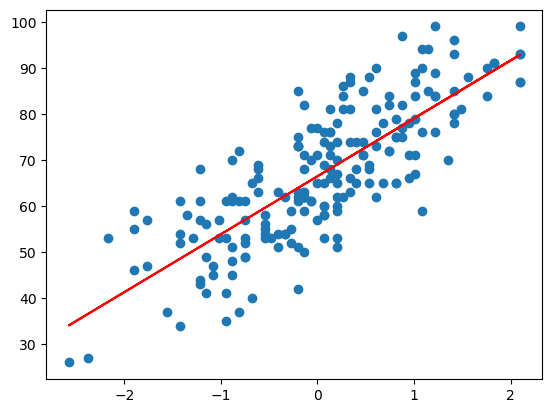

In [25]:
plt.scatter(x_test,y_test)
plt.plot(x_test,rgr.predict(x_test),'r-')

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score

In [27]:
mae=mean_absolute_error(y_test,y_predict)
mape=mean_absolute_percentage_error(y_test,y_predict)*100
mse=mean_squared_error(y_test,y_predict)
rmse=np.sqrt(mae)

In [28]:
print(mae,mape, mse,rmse)

7.335776056294559 11.95305113891867 79.21817752538502 2.7084637816102615


In [29]:
score=r2_score(y_test,y_predict)

In [30]:
score

0.6363788452013939

In [31]:
1-(1-score)*(len(y_test)-1)/((len(y_test)-1)-x_test.shape[1]-1)

0.6326872598734892

In [32]:
df.head()

,reading_score,math_score
0,72,72
1,90,69
2,95,90
3,57,47
4,78,76


In [35]:
round(rgr.predict([[scalar.transform([[78]])[0][0]]])[0],2)

/Users/nithinkumar/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


74.09